In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import Regularizer


import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
with open('America.txt', 'r') as america:
  data = america.read()

tokenizer = Tokenizer()
corpus = data.lower().split('\n')

In [4]:
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1
print(tokenizer.word_index)

{'i': 1, 'the': 2, 'america': 3, 'to': 4, 'you': 5, 'my': 6, 'a': 7, 'and': 8, 'i’m': 9, 'me': 10, 'in': 11, 'of': 12, 'is': 13, 'when': 14, 'your': 15, 'will': 16, 'be': 17, 'are': 18, 'was': 19, 'all': 20, 'go': 21, 'don’t': 22, 'it': 23, 'this': 24, 'get': 25, 'have': 26, 'them': 27, 'good': 28, 'what': 29, 'for': 30, 'read': 31, 'about': 32, 'serious': 33, 'that': 34, 'russians': 35, 'wants': 36, 'our': 37, 'her': 38, 'by': 39, 'mind': 40, 'right': 41, 'at': 42, 'not': 43, 'made': 44, 'want': 45, 'must': 46, 'it’s': 47, 'haven’t': 48, 'on': 49, 'every': 50, 'from': 51, 'time': 52, 'am': 53, 'us': 54, 'him': 55, 'nothing': 56, 'two': 57, 'january': 58, '17': 59, '1956': 60, 'end': 61, 'war': 62, 'yourself': 63, 'with': 64, 'feel': 65, 'won’t': 66, 'write': 67, 'angelic': 68, 'take': 69, 'can': 70, 'need': 71, 'after': 72, 'who': 73, 'next': 74, 'some': 75, 'tangiers': 76, 'come': 77, 'sinister': 78, 'or': 79, 'up': 80, 'sentimental': 81, 'communist': 82, 'marijuana': 83, 'chance': 8

Convert simple corpus into training data

In [5]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

Pad sequences and create labels

In [6]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create predictors and labels
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Create a model with 2 lstms

In [43]:
model = Sequential()
model.add(Embedding(total_words, 64, input_length=max_sequence_len-1))  
model.add(LSTM(20))  
model.add(Flatten())
model.add(Dense(total_words, activation='softmax'))  

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
history = model.fit(predictors, label, epochs=500, verbose=1)

Train on 763 samples
Epoch 1/500
763/763 [==============================] - 2s 3ms/sample - loss: 6.0405 - accuracy: 0.0170
Epoch 2/500
763/763 [==============================] - 1s 893us/sample - loss: 6.0111 - accuracy: 0.0249
Epoch 3/500
763/763 [==============================] - 1s 966us/sample - loss: 5.9094 - accuracy: 0.0197
Epoch 4/500
763/763 [==============================] - 1s 936us/sample - loss: 5.7501 - accuracy: 0.0275
Epoch 5/500
763/763 [==============================] - 1s 939us/sample - loss: 5.6170 - accuracy: 0.0446
Epoch 6/500
763/763 [==============================] - 1s 895us/sample - loss: 5.5421 - accuracy: 0.0419
Epoch 7/500
763/763 [==============================] - 1s 881us/sample - loss: 5.4892 - accuracy: 0.0459
Epoch 8/500
763/763 [==============================] - 1s 937us/sample - loss: 5.4503 - accuracy: 0.0459
Epoch 9/500
763/763 [==============================] - 1s 944us/sample - loss: 5.4158 - accuracy: 0.0446
Epoch 10/500
763/763 [==============

763/763 [==============================] - 1s 979us/sample - loss: 3.5190 - accuracy: 0.2477
Epoch 80/500
763/763 [==============================] - 1s 978us/sample - loss: 3.4976 - accuracy: 0.2464
Epoch 81/500
763/763 [==============================] - 1s 979us/sample - loss: 3.4732 - accuracy: 0.2529
Epoch 82/500
763/763 [==============================] - 1s 987us/sample - loss: 3.4500 - accuracy: 0.2608
Epoch 83/500
763/763 [==============================] - 1s 990us/sample - loss: 3.4251 - accuracy: 0.2595
Epoch 84/500
763/763 [==============================] - 1s 980us/sample - loss: 3.4027 - accuracy: 0.2621
Epoch 85/500
763/763 [==============================] - 1s 965us/sample - loss: 3.3793 - accuracy: 0.2765
Epoch 86/500
763/763 [==============================] - 1s 970us/sample - loss: 3.3542 - accuracy: 0.2805
Epoch 87/500
763/763 [==============================] - 1s 979us/sample - loss: 3.3328 - accuracy: 0.2870
Epoch 88/500
763/763 [==============================] - 1s 

763/763 [==============================] - 1s 983us/sample - loss: 2.0331 - accuracy: 0.6553 - loss: 2.0456 - ac - ETA: 0s - loss: 2.0258 - accuracy: 0.
Epoch 155/500
763/763 [==============================] - 1s 967us/sample - loss: 2.0185 - accuracy: 0.6619 - loss: 2.0490 - accuracy
Epoch 156/500
763/763 [==============================] - 1s 958us/sample - loss: 2.0034 - accuracy: 0.6645
Epoch 157/500
763/763 [==============================] - 1s 968us/sample - loss: 1.9900 - accuracy: 0.6684
Epoch 158/500
763/763 [==============================] - 1s 967us/sample - loss: 1.9734 - accuracy: 0.6684
Epoch 159/500
763/763 [==============================] - 1s 963us/sample - loss: 1.9588 - accuracy: 0.6697
Epoch 160/500
763/763 [==============================] - 1s 953us/sample - loss: 1.9457 - accuracy: 0.6750
Epoch 161/500
763/763 [==============================] - 1s 961us/sample - loss: 1.9323 - accuracy: 0.6737 - loss: 1.9791 - accuracy
Epoch 162/500
763/763 [=======================

763/763 [==============================] - 1s 962us/sample - loss: 1.2113 - accuracy: 0.7772
Epoch 228/500
763/763 [==============================] - 1s 963us/sample - loss: 1.2037 - accuracy: 0.7772
Epoch 229/500
763/763 [==============================] - 1s 971us/sample - loss: 1.1963 - accuracy: 0.7785
Epoch 230/500
763/763 [==============================] - 1s 980us/sample - loss: 1.1880 - accuracy: 0.7811
Epoch 231/500
763/763 [==============================] - 1s 973us/sample - loss: 1.1805 - accuracy: 0.7824
Epoch 232/500
763/763 [==============================] - 1s 1ms/sample - loss: 1.1735 - accuracy: 0.7837
Epoch 233/500
763/763 [==============================] - 1s 1ms/sample - loss: 1.1655 - accuracy: 0.7864
Epoch 234/500
763/763 [==============================] - 1s 975us/sample - loss: 1.1583 - accuracy: 0.7903 - loss: 1.227
Epoch 235/500
763/763 [==============================] - 1s 957us/sample - loss: 1.1516 - accuracy: 0.7916
Epoch 236/500
763/763 [==================

763/763 [==============================] - 1s 974us/sample - loss: 0.7849 - accuracy: 0.8624
Epoch 303/500
763/763 [==============================] - 1s 967us/sample - loss: 0.7813 - accuracy: 0.8650
Epoch 304/500
763/763 [==============================] - 1s 972us/sample - loss: 0.7765 - accuracy: 0.8663
Epoch 305/500
763/763 [==============================] - 1s 961us/sample - loss: 0.7734 - accuracy: 0.8676
Epoch 306/500
763/763 [==============================] - 1s 972us/sample - loss: 0.7693 - accuracy: 0.8689
Epoch 307/500
763/763 [==============================] - 1s 975us/sample - loss: 0.7663 - accuracy: 0.8689
Epoch 308/500
763/763 [==============================] - 1s 974us/sample - loss: 0.7615 - accuracy: 0.8689
Epoch 309/500
763/763 [==============================] - 1s 974us/sample - loss: 0.7578 - accuracy: 0.8676
Epoch 310/500
763/763 [==============================] - 1s 969us/sample - loss: 0.7542 - accuracy: 0.8676
Epoch 311/500
763/763 [============================

763/763 [==============================] - 1s 943us/sample - loss: 0.5600 - accuracy: 0.8847
Epoch 379/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5577 - accuracy: 0.8847
Epoch 380/500
763/763 [==============================] - 1s 959us/sample - loss: 0.5553 - accuracy: 0.8820
Epoch 381/500
763/763 [==============================] - 1s 978us/sample - loss: 0.5539 - accuracy: 0.8820
Epoch 382/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5515 - accuracy: 0.8860
Epoch 383/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5489 - accuracy: 0.8820
Epoch 384/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5472 - accuracy: 0.8834
Epoch 385/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5456 - accuracy: 0.8847
Epoch 386/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.5434 - accuracy: 0.8886
Epoch 387/500
763/763 [==============================] - 1s 1ms

763/763 [==============================] - 1s 991us/sample - loss: 0.4344 - accuracy: 0.8938
Epoch 454/500
763/763 [==============================] - 1s 974us/sample - loss: 0.4332 - accuracy: 0.9017
Epoch 455/500
763/763 [==============================] - 1s 989us/sample - loss: 0.4318 - accuracy: 0.9017
Epoch 456/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.4312 - accuracy: 0.9017
Epoch 457/500
763/763 [==============================] - 1s 982us/sample - loss: 0.4294 - accuracy: 0.9017
Epoch 458/500
763/763 [==============================] - 1s 980us/sample - loss: 0.4277 - accuracy: 0.9017
Epoch 459/500
763/763 [==============================] - 1s 982us/sample - loss: 0.4276 - accuracy: 0.8978
Epoch 460/500
763/763 [==============================] - 1s 1ms/sample - loss: 0.4258 - accuracy: 0.90170s - loss: 0.4123 - ac
Epoch 461/500
763/763 [==============================] - 1s 991us/sample - loss: 0.4244 - accuracy: 0.9030
Epoch 462/500
763/763 [==========

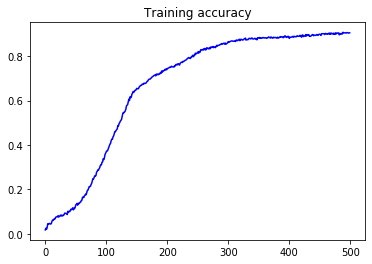

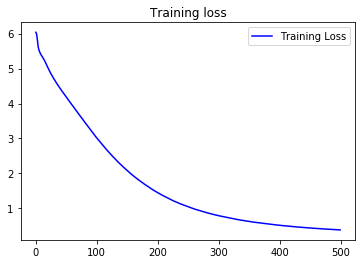

In [44]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [78]:
seed_text = "I refuse to"
next_words = 10
seed_text

'I refuse to'

Text to sequences

In [79]:
token_list = tokenizer.texts_to_sequences([seed_text])[0]
token_list[:10]

[1, 170, 4]

Pad

In [80]:
token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

In [81]:
predicted = model.predict_classes(token_list, verbose=0)

In [82]:
for word, index in tokenizer.word_index.items():
    if index == predicted:
        output_word = word
        break
        
    seed_text += " " + output_word 
print(seed_text)

I refuse to give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give give


Conclusion: We need larger corpus